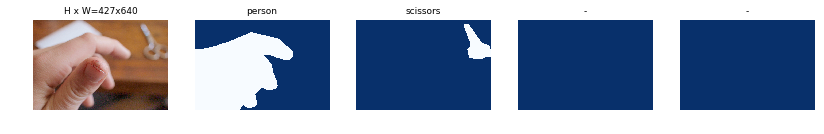

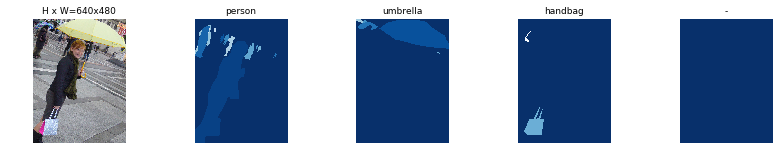

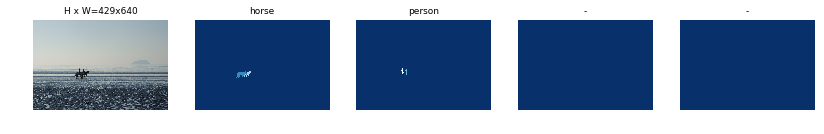

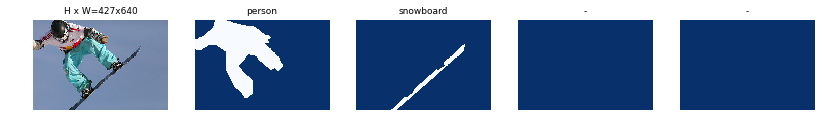

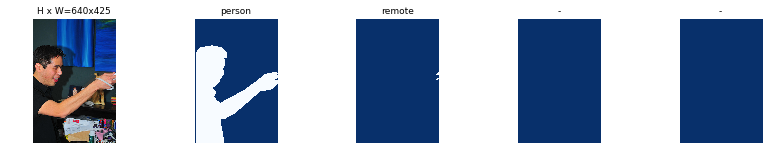

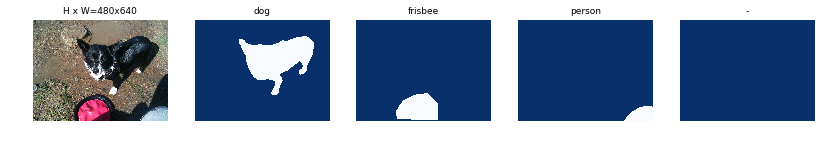

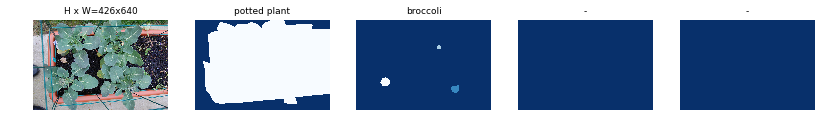

In [6]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 7)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

### Display Image with bounding boxes from `output_rois`

Classes     :  [38 38 38  1  1  1  1  1  1  1  1  1 38  1]
image_id    :  36466  Reference:  http://cocodataset.org/#explore?id=314285
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000
mask                     shape: (480, 640, 14)        min:    0.00000  max:    1.00000
class_ids                shape: (14,)                 min:    1.00000  max:   38.00000
bbox                     shape: (14, 4)               min:    0.00000  max:  640.00000
14 14
Image id:  36466   Image meta [36466   480   640     3   128     0   896  1024     1     1]
Classes :  ['surfboard', 'surfboard', 'surfboard', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'surfboard', 'person']
40
i:  0 id : 0 class_id:  1
i:  1 id : 1 class_id:  1
i:  2 id : 2 class_id:  1
i:  3 id : 3 class_id:  1
i:  4 id : 4 class_id:  38
i:  5 id : 5 class_id:  1
i:  6 id : 6 class_id:  1
i:  7 id : 7 class_id:  1
i:  8 id : 8 class_id:  1
i:  9 id : 9 clas

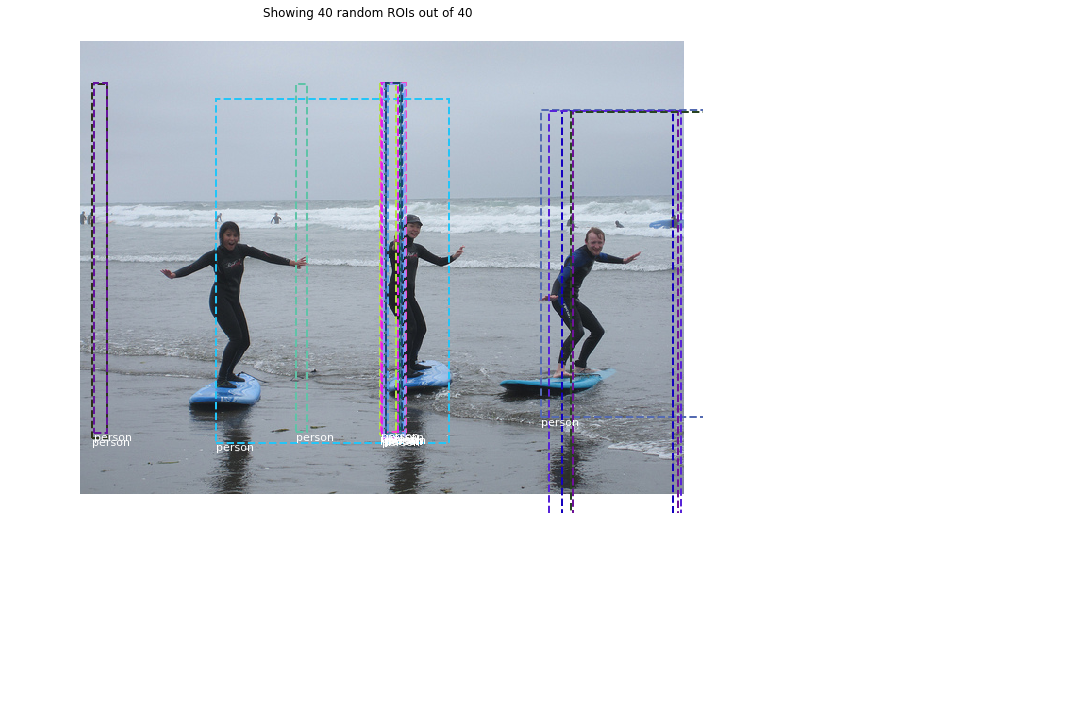

In [20]:
image_id = img_meta[img_idx,0]
image = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
bbox = utils.extract_bboxes(mask)

# print('Image meta  : ', img_meta[img_idx])
print('Classes     : ', class_ids)
print("image_id    : ", image_id, ' Reference: ', dataset_train.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
print(class_ids.shape[0], bbox.shape[0])    
# class_names = [str(dataset_train.class_names[class_id]) for class_id in class_ids]
class_names = dataset_train.class_names
# print('Class Names : ', class_names)
# visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)
print('Image id: ',image_id , '  Image meta', img_meta[img_idx,:10])
print('Classes : ', [class_names[i] for i in class_ids])

refined_rois = []
unnorm_output_rois = output_rois * [1024,1024,104,1024]
# Display image and instances
# visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)   
visualize.draw_output_rois(image, unnorm_output_rois[0,:40], target_class_ids[0,:40], class_names, limit=10)

In [ ]:
print(pred_heatmap_norm.shape)
temp = pred_heatmap_norm
np.set_printoptions(linewidth=150, threshold=10000, suppress=False)
print('  Temp shape :',  temp.shape)
temp_sum = np.sum(temp,axis=(1,2))
print('temp_sum is ', temp_sum.shape)
for i in range(5):
    for j in range(4):
        print('img ',i,' class ', j, ' sum:',temp_sum[i,j],  ' max: ',np.max(temp[i,:,:,j]),' mean: ', np.mean(temp[i,:,:,j]),' min: ', np.min(temp[i,:,:,j]))    


####  Display for visual check - `fcn_heatmap_norm` is the final result from  `FCN`

In [ ]:
temp = fcn_heatmap
print('  Temp shape :',  temp.shape)
temp_sum = np.sum(temp,axis=(1,2))
print('temp_sum is ', temp_sum.shape)
for i in range(5):
    for j in range(4):
        print('img / cls ',i,'/', j, ' sum:',temp_sum[i,j])
        print('sum: ', np.sum(temp[i,:,:,j] ),' max: ',np.max(temp[i,:,:,j]),' mean: ', np.mean(temp[i,:,:,j]),' min: ', np.min(temp[i,:,:,j]))    

In [ ]:
sess = KB.get_session()
with sess.as_default():
    temp = fcn_heatmap
    np.set_printoptions(linewidth=150, threshold=10000)
    print('  output shapes :',  temp.get_shape())
    temp_sum = tf.reduce_sum(temp, [2,3])
    temp_min = tf.reduce_min(temp, [2,3])
    temp_max = tf.reduce_max(temp, [2,3])
    temp_avg = tf.reduce_mean(temp, [2,3])
    print('temp_sum is ', temp_sum.shape)
    for i in range(5):
        for j in range(4):
                print('img/cls ',i,'/', j,'  sum:',temp_sum[i,j], 'min',temp_min[i,j] ,'max',temp_max[i,j] ,'avg',temp_avg[i,j])


####  Display for visual check - `gt_heatmap_scores`  and `fcn_heatmap_scores` 

In [ ]:
# with sess.as_default():
np.set_printoptions(linewidth=150, precision=6)
# print('scatter shape is ', pred_scatt.get_shape())

img = 0
for i in [1,2,3]:
    for j in range(32):
        print('Image ', img , '/ Class ',i,' ------------')

        print(gt_heatmap_scores[img,i,j])
        print(pred_heatmap_scores[img,i,j])
        print(fcn_heatmap_scores[img,i,j,[0,1,2,3,4,5,11,12,13,14,15]])